In [456]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [457]:
churn_df=pd.read_csv(r"C:\Users\mwael\OneDrive\Desktop\home\course\kaggel\kaggeldata\Churn_Modelling.csv")
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [458]:
churn_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [459]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [460]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [461]:
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [462]:
# we can see nan values in data so we will drop it
if 1 in (churn_df.isnull().sum().values):
    churn_df=churn_df.dropna(axis=0)



churn_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
10,11,15767821,Bearce,528,France,Male,31.0,6,102016.72,2,0.0,0.0,80181.12,0
11,12,15737173,Andrews,497,Spain,Male,24.0,3,0.00,2,1.0,0.0,76390.01,0
12,13,15632264,Kay,476,France,Female,34.0,10,0.00,2,1.0,0.0,26260.98,0
13,14,15691483,Chin,549,France,Female,25.0,5,0.00,2,0.0,0.0,190857.79,0


In [463]:
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [464]:
churn_df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [465]:
if "France" in churn_df['Geography'].unique():
    churn_df['Geography']=churn_df['Geography'].map({"France":4,"Spain":5,"Germany":6})
    
churn_df.head(10)



C:\Users\mwael\AppData\Local\Temp\ipykernel_27224\2631378922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['Geography']=churn_df['Geography'].map({"France":4,"Spain":5,"Germany":6})


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,4,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,5,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,4,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,4,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,5,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,8,15656148,Obinna,376,6,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
10,11,15767821,Bearce,528,4,Male,31.0,6,102016.72,2,0.0,0.0,80181.12,0
11,12,15737173,Andrews,497,5,Male,24.0,3,0.00,2,1.0,0.0,76390.01,0
12,13,15632264,Kay,476,4,Female,34.0,10,0.00,2,1.0,0.0,26260.98,0
13,14,15691483,Chin,549,4,Female,25.0,5,0.00,2,0.0,0.0,190857.79,0


In [466]:
if "RowNumber" in churn_df.columns:
    churn_df.drop("RowNumber",axis=1,inplace=True)



C:\Users\mwael\AppData\Local\Temp\ipykernel_27224\2771189110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df.drop("RowNumber",axis=1,inplace=True)


In [467]:
if "Surname" in churn_df.columns:
    churn_df.drop("Surname",axis=1,inplace=True)

    

C:\Users\mwael\AppData\Local\Temp\ipykernel_27224\1697706349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df.drop("Surname",axis=1,inplace=True)


In [468]:
if "Female" in churn_df['Gender'].unique():
    churn_df['Gender']=churn_df['Gender'].map({"Female":0,"Male":1})

churn_df.head(10)

C:\Users\mwael\AppData\Local\Temp\ipykernel_27224\2211374817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['Gender']=churn_df['Gender'].map({"Female":0,"Male":1})


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,4,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,608,5,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,502,4,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,699,4,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15574012,645,5,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,15656148,376,6,0,29.0,4,115046.74,4,1.0,0.0,119346.88,1
10,15767821,528,4,1,31.0,6,102016.72,2,0.0,0.0,80181.12,0
11,15737173,497,5,1,24.0,3,0.00,2,1.0,0.0,76390.01,0
12,15632264,476,4,0,34.0,10,0.00,2,1.0,0.0,26260.98,0
13,15691483,549,4,0,25.0,5,0.00,2,0.0,0.0,190857.79,0


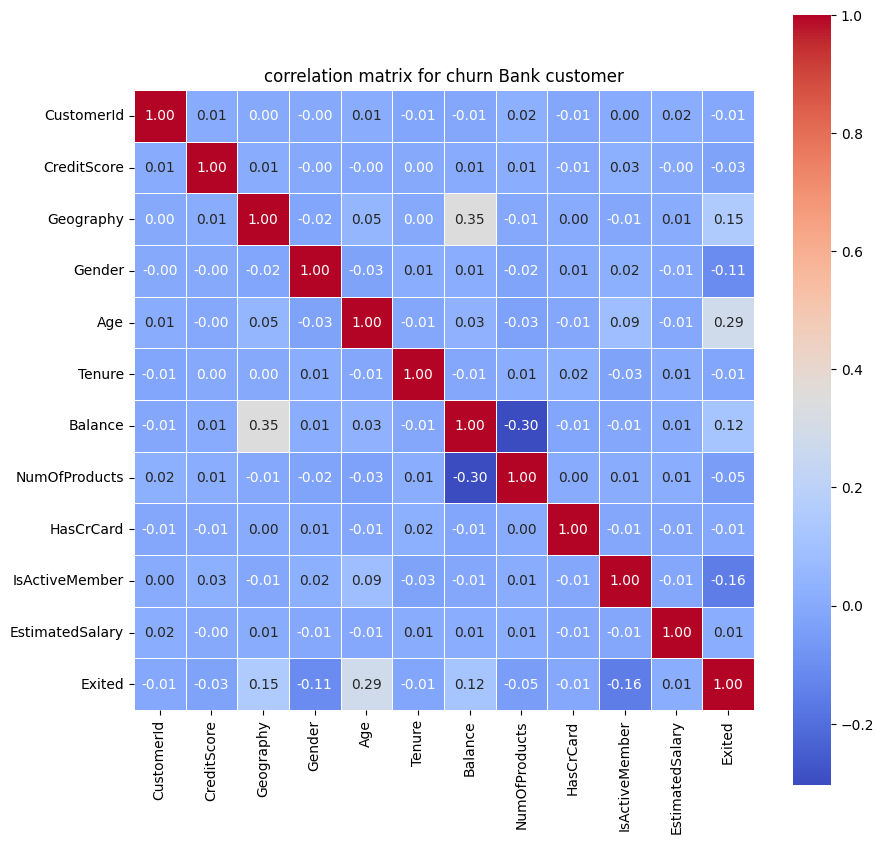

In [469]:
corr_matrix=churn_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,linewidths=0.7,fmt=".2f", cmap='coolwarm', square=True)
plt.title("correlation matrix for churn Bank customer")
plt.show()



In [470]:
scaler=MinMaxScaler()
churn_df=pd.DataFrame(scaler.fit_transform(churn_df),columns=churn_df.columns)

In [471]:
churn_df.head(10)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.275616,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.326454,0.516,0.5,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.214421,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.542636,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,0.033245,0.590,0.5,1.0,0.351351,0.8,0.453394,0.333333,1.0,0.0,0.748797,1.0
5,0.361804,0.052,1.0,0.0,0.148649,0.4,0.458540,1.000000,1.0,0.0,0.596733,1.0
6,0.808516,0.356,0.0,1.0,0.175676,0.6,0.406606,0.333333,0.0,0.0,0.400886,0.0
7,0.685918,0.294,0.5,1.0,0.081081,0.3,0.000000,0.333333,1.0,0.0,0.381929,0.0
8,0.266264,0.252,0.0,0.0,0.216216,1.0,0.000000,0.333333,1.0,0.0,0.131260,0.0
9,0.503150,0.398,0.0,0.0,0.094595,0.5,0.000000,0.333333,0.0,0.0,0.954322,0.0


In [472]:
x=churn_df.drop("Exited",axis=1)
y=churn_df['Exited']

In [473]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [474]:
model=Sequential([Dense(128,activation="relu"),
                  Dense(64,activation="relu"),
                  Dense(64,activation="relu"),
                  Dense(64,activation="relu"),
                  Dense(32,activation="relu"),
                  Dense(1,activation="sigmoid")])
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [475]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ["accuracy"]
)

In [476]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.3) 

Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7867 - loss: 0.5380 - val_accuracy: 0.8090 - val_loss: 0.4370
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8071 - loss: 0.4512 - val_accuracy: 0.8329 - val_loss: 0.4034
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8233 - loss: 0.4217 - val_accuracy: 0.8390 - val_loss: 0.3888
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8379 - loss: 0.3865 - val_accuracy: 0.8414 - val_loss: 0.3839
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8546 - loss: 0.3600 - val_accuracy: 0.8495 - val_loss: 0.3710
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8492 - loss: 0.3594 - val_accuracy: 0.8510 - val_loss: 0.3654
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8429 - loss: 0.3565 - val_accuracy: 0.8581 - val_loss: 0.3629
Epoch 8/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8538 - loss: 0.3421 - val_accuracy: 0.

In [477]:
y_pred=model.predict(x_test) 

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [478]:
print("ROC:", roc_auc_score(y_test,y_pred))


ROC: 0.8565674979669288
